In [2]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv(r'C:\Users\xzyad\Downloads\Airbnb listings and review dataset (1).zip', encoding='latin-1')
df2 = pd.read_csv(r'C:\Users\xzyad\Downloads\Airbnblisting.zip', encoding='latin-1')

merged_df = pd.merge(df1, df2, on='listing_id')

# Write the merged DataFrame to a new CSV file
merged_df.to_csv('merged.csv', index=False)

In [4]:
print(merged_df.head()) # the first five rows

   listing_id  review_id        date  reviewer_id  \
0       11798  330265172  2018-09-30     11863072   
1       11798  437228860  2019-04-14      3153099   
2       11798  274915772  2018-06-10     13021254   
3       11798  284327934  2018-07-01     74131694   
4       11798  223467265  2018-01-01     39665778   

                          name  host_id  host_since  \
0  Loft very charming in Paris    44444  2009-10-08   
1  Loft very charming in Paris    44444  2009-10-08   
2  Loft very charming in Paris    44444  2009-10-08   
3  Loft very charming in Paris    44444  2009-10-08   
4  Loft very charming in Paris    44444  2009-10-08   

                  host_location host_response_time  host_response_rate  ...  \
0  Paris, Ile-de-France, France                NaN                 NaN  ...   
1  Paris, Ile-de-France, France                NaN                 NaN  ...   
2  Paris, Ile-de-France, France                NaN                 NaN  ...   
3  Paris, Ile-de-France, France   

In [5]:
print(df1.info()) # summary of the DataFrame columns and their data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   listing_id   int64 
 1   review_id    int64 
 2   date         object
 3   reviewer_id  int64 
dtypes: int64(3), object(1)
memory usage: 164.0+ MB
None


In [6]:
print(df2.describe()) # summary statistics including count, mean, standard deviation, minimum, and maximum values.

         listing_id       host_id  host_response_rate  host_acceptance_rate  \
count  2.797120e+05  2.797120e+05       150930.000000         166625.000000   
mean   2.638196e+07  1.081658e+08            0.865939              0.827168   
std    1.442576e+07  1.108570e+08            0.283744              0.289202   
min    2.577000e+03  1.822000e+03            0.000000              0.000000   
25%    1.384462e+07  1.720656e+07            0.900000              0.780000   
50%    2.767098e+07  5.826911e+07            1.000000              0.980000   
75%    3.978485e+07  1.832853e+08            1.000000              1.000000   
max    4.834353e+07  3.901874e+08            1.000000              1.000000   

       host_total_listings_count       latitude      longitude   accommodates  \
count              279547.000000  279712.000000  279712.000000  279712.000000   
mean                   24.581612      18.761862      12.595075       3.288736   
std                   284.041143      32.5603

In [7]:
print(df2.shape) # the number of rows and columns in the DataFrame

(279712, 33)


In [8]:
print(df2['host_response_time'].value_counts()) # This code displays the frequency of each unique value in the specified column

host_response_time
within an hour        83464
within a few hours    28891
within a day          23425
a few days or more    15150
Name: count, dtype: int64


In [9]:
print(df2.dtypes)  # data types of each column 

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [10]:
listing_ids = df1['listing_id'].unique()
print(listing_ids) # Display the unique listing_id values

[   11798    15383    16455 ... 47896175 47900451 47998038]


In [11]:
print(df1['listing_id'].value_counts())

listing_id
17222007    891
8637229     828
1249964     796
32011332    762
2399029     754
           ... 
46196723      1
6563893       1
6575768       1
6577816       1
47998038      1
Name: count, Length: 193556, dtype: int64


In [12]:
print(df1['review_id'].value_counts())

review_id
273473836    2
588812335    2
543276514    2
442312418    2
335456934    2
            ..
60909028     1
60305812     1
723071641    1
705399748    1
730320626    1
Name: count, Length: 5372983, dtype: int64


In [13]:
print(df1['date'].value_counts())

date
2020-01-02    10136
2020-01-01     9635
2019-10-06     9423
2019-11-03     8937
2019-09-29     8905
              ...  
2010-05-15        1
2009-10-28        1
2009-11-13        1
2009-11-22        1
2013-02-23        1
Name: count, Length: 4103, dtype: int64


In [14]:
print(df2['host_location'].value_counts())

host_location
Paris, Ile-de-France, France                           47794
New York, New York, United States                      24040
Rome, Lazio, Italy                                     20138
Cape Town, Western Cape, South Africa                  13602
Rio de Janeiro, State of Rio de Janeiro, Brazil        13211
                                                       ...  
Niort, Poitou-Charentes, France                            1
Gloversville, New York, United States                      1
Rangsit, Pathum Thani, Thailand                            1
Ozumba de Alzate, Estado de Mexico, Mexico                 1
BrasÃÂ­lia de Minas, State of Minas Gerais, Brazil        1
Name: count, Length: 7159, dtype: int64


In [15]:
null_counts = df1.isnull().sum()
print(null_counts) # Checking for null values in the DataFrame

listing_id     0
review_id      0
date           0
reviewer_id    0
dtype: int64


In [16]:
null_counts_column = df2['review_scores_value'].isnull().sum()
print(null_counts_column)

91785


In [17]:
null_counts_column = df1['date'].isnull().sum()
print(null_counts_column)

0


In [18]:
null_counts_column = df1['listing_id'].isnull().sum()
print(null_counts_column)

0


In [19]:
missing_values = df2.isna().sum()
print(missing_values) # Checking for missing values in the DataFrame

listing_id                          0
name                              175
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

In [20]:
df2.drop(['host_response_time', 'host_response_rate','host_acceptance_rate','district' , 'review_scores_rating' , 'review_scores_accuracy' ,
'review_scores_cleanliness' , 'review_scores_checkin' , 'review_scores_communication' , 'review_scores_location' , 'review_scores_value' ],axis=1, inplace=True)

In [21]:
duplicate_rows = df2.duplicated()
print(df2[duplicate_rows]) # Display the duplicate rows 

Empty DataFrame
Columns: [listing_id, name, host_id, host_since, host_location, host_is_superhost, host_total_listings_count, host_has_profile_pic, host_identity_verified, neighbourhood, city, latitude, longitude, property_type, room_type, accommodates, bedrooms, amenities, price, minimum_nights, maximum_nights, instant_bookable]
Index: []

[0 rows x 22 columns]


In [22]:
default_value = 0
df2['test_plot_column'] = default_value # new column to plot faster

In [23]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   listing_id                 279712 non-null  int64  
 1   name                       279537 non-null  object 
 2   host_id                    279712 non-null  int64  
 3   host_since                 279547 non-null  object 
 4   host_location              278872 non-null  object 
 5   host_is_superhost          279547 non-null  object 
 6   host_total_listings_count  279547 non-null  float64
 7   host_has_profile_pic       279547 non-null  object 
 8   host_identity_verified     279547 non-null  object 
 9   neighbourhood              279712 non-null  object 
 10  city                       279712 non-null  object 
 11  latitude                   279712 non-null  float64
 12  longitude                  279712 non-null  float64
 13  property_type              27

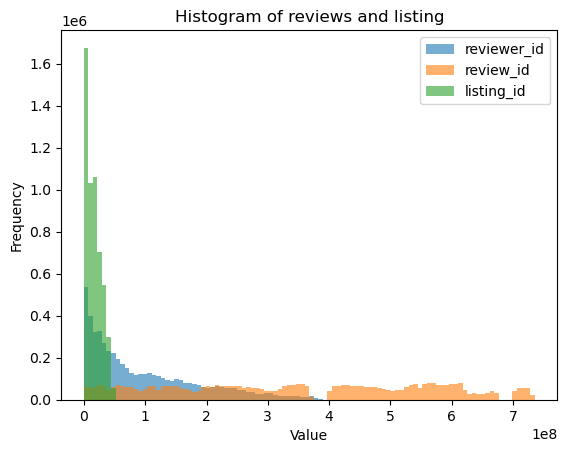

In [25]:
df1[['reviewer_id', 'review_id', 'listing_id']].plot(kind='hist', bins=100, alpha=0.6)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of reviews and listing')
plt.show();

In [ ]:

mean = df1['review_id'].mean()
median = df1['review_id'].median()
mode = df1['review_id'].mode()
std = df1['review_id'].std()
min_value = df1['review_id'].min()
max_value = df1['review_id'].max()
quartiles = df1['review_id'].quantile([0.25, 0.5, 0.75])

print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Standard Deviation:', std)
print('Minimum:', min_value)
print('Maximum:', max_value)
print('Quartiles:', quartiles)

In [ ]:
import seaborn as sns
sns.boxplot(x=df1['reviewer_id'], y=df2['city'])
plt.xlabel('reviewer')
plt.ylabel('city')
plt.title('reviewe vs. cities')
plt.show()

In [ ]:
medians = df2[['latitude', 'longitude']].median()
print("Medians:")
print(medians)

In [ ]:
import pandas as pd

# Assuming your DataFrame is called 'df' and you want to fill null values in column 'column1' with median1 and null values in column 'column2' with median2
median1 = df2['latitude'].median()
median2 = df2['longitude'].median()

df2[['host_location','test_plot_column']] = df2[['latitude', 'longitude']].apply(lambda x: x.fillna(median1) if pd.isnull(x).any() else x)

In [ ]:
missing_values = df2.isna().sum()
print(missing_values) # Checking for missing values in the DataFrame

In [ ]:
print(df2['host_location'].value_counts())

In [27]:
print(df2['price'].value_counts())

price
100      6882
50       6438
70       6207
60       6172
80       6148
         ... 
4941        1
2055        1
2751        1
2553        1
36473       1
Name: count, Length: 5194, dtype: int64


In [ ]:
df2['bedrooms'] = df2['room_type'].interpolate(method='linear')


#Alternatively, you can specify the 'axis' parameter to interpolate along columns or rows

In [ ]:
missing_values = df2.isna().sum()
print(missing_values) # Checking for missing values in the DataFrame

In [26]:
df2['name'] = df2['listing_id'].fillna(value=0 , limit=10)

In [ ]:
missing_values = df2.isna().sum()
print(missing_values) # Checking for missing values in the DataFrame

In [ ]:
df2.dropna(inplace=True) #dropping only null values

In [ ]:
missing_values = df2.isna().sum()
print(missing_values) # Checking for missing values in the DataFrame